In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Winedata.txt');

after loading the data we will perform some EDA.

In [3]:
df.shape

(178, 14)

we have 178 data points and 13 features + 1 class label

In [4]:
df.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
df.dtypes

class                     int64
Alcohol                 float64
Malic acid              float64
Ash                     float64
Alcalinity of ash       float64
Magnesium                 int64
Total phenols           float64
Flavanoids              float64
Nonflavanoid phenols    float64
Proanthocyanins         float64
Color intensity         float64
Hue                     float64
OD280/OD315             float64
Proline                   int64
dtype: object

all the features of given dataset are numerial(int/float)

In [6]:
df.columns

Index(['class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315',
       'Proline   '],
      dtype='object')

In [7]:
df.describe()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


we found that all the features have 178 data points, i.e no missing values.

In [8]:
df['class'].value_counts()

2    71
1    59
3    48
Name: class, dtype: int64

class 1 has 59, class 2 has 71 and class 3 has 48 datapoints

In [1]:
Y = df['class']

NameError: name 'df' is not defined

In [10]:
X = df.drop('class',axis = 1, inplace = False)

X has 13 features and Y has 1 features (class labels)

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
x_data = StandardScaler().fit_transform(X)

we have performed column standardization such that mean = 0 & std = 1.
This is done to prevent from scaling problem

In [21]:
from sklearn.model_selection import train_test_split

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x_data,Y,test_size = 0.30,random_state = 42,stratify=Y)

split the data set in train and test part

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
model = KNeighborsClassifier(1)

In [47]:
model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [50]:
yout= model.predict(x_test)

Performed KNN where k = 1

In [51]:
model.score(x_test,y_test)

0.9629629629629629

In [55]:
from sklearn.metrics import f1_score
f1_score(y_test,yout,average= 'micro')


0.9629629629629629

In [57]:
from sklearn.cross_validation import cross_val_score

In [58]:
neighbors = list(range(1,30,2))

In [59]:
cv_score=[]

In [60]:
for k in neighbors:
    knn = KNeighborsClassifier(k)
    score = cross_val_score(knn,x_train,y_train,cv=10,scoring = 'accuracy')
    cv_score.append(score.mean())

In [63]:
import matplotlib.pyplot as plt

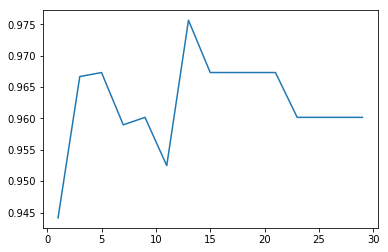

In [75]:
plt.plot(neighbors,cv_score)

In [76]:
best_k =neighbors[cv_score.index(max(cv_score))]

In [77]:
best_k

13

In [78]:
optimal_model = KNeighborsClassifier(best_k)

In [79]:
optimal_model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')

In [80]:
optimal_model.score(x_test,y_test)

0.9629629629629629